In [1]:
from approximation import ODE_approx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numerical_methods import forward_euler_h

def f(t, x):
      return -x
def x_actual(x0, t):
      return x0*np.exp(-t)
M = 1
L = 2
T = 1
eps = 0.1
h = forward_euler_h(M, L, T, eps)
f_approx_fn = ODE_approx(f, 1, M, L, T, eps=eps)

In [3]:
x0 = 0.9
t0 = 0.5
print("h: ", h)
print("x_actual: ", x_actual(x0, t0))
print("x_approx: ", f_approx_fn([x0], t0))

h:  0.06260705709986626
x_actual:  0.5458775937413701
x_approx:  [array(0.53704733)]


0.010629439103237714


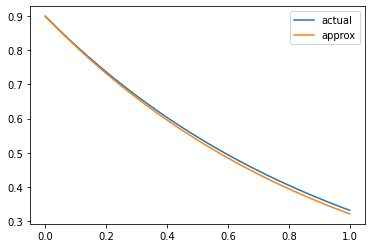

In [4]:
tt = np.linspace(0, T)
xx_actual = [x_actual(x0, t) for t in tt]
xx_approx = [f_approx_fn([x0], t)[0] for t in tt]
plt.plot(tt, xx_actual, label="actual")
plt.plot(tt, xx_approx, label="approx")
plt.legend()
print(max(abs(np.array(xx_actual)-np.array(xx_approx))))